In [6]:
import warnings
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('Terrorism_dataset.csv',encoding='ISO-8859-1')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
data.shape

(181691, 135)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
#replacing the names with my liking

data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
#showing only required values
data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
#checking for the duplicates
duplicateRowsDF = data[data.duplicated()]
duplicateRowsDF

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
68,1970,2,16,United States,California,North America,Berkeley,37.874043,-122.280022,Bombing/Explosion,0.0,0.0,department store,NaN,Unknown,Business,Explosives,NaN
88,1970,2,23,United States,Nebraska,North America,South Sioux City,42.470310,-96.413949,Bombing/Explosion,0.0,0.0,Power Transmission Pole in the Dakota City/Sio...,"2/23/1970: In a series of related attacks, unk...",Strikers,Utilities,Explosives,The attack occurred during the violent Iowa Be...
89,1970,2,23,United States,Nebraska,North America,South Sioux City,42.470310,-96.413949,Bombing/Explosion,0.0,0.0,Power Transmission Pole in the Dakota City/Sio...,"2/23/1970: In a series of related attacks, unk...",Strikers,Utilities,Explosives,The attack occurred during the violent Iowa Be...
90,1970,2,23,United States,Nebraska,North America,South Sioux City,42.470310,-96.413949,Bombing/Explosion,0.0,0.0,Power Transmission Pole in the Dakota City/Sio...,"2/23/1970: In a series of related attacks, unk...",Strikers,Utilities,Explosives,The attack occurred during the violent Iowa Be...
337,1970,6,9,Jordan,Amman,Middle East & North Africa,Amman,31.950001,35.933331,Hostage Taking (Barricade Incident),0.0,0.0,Hotels,NaN,Popular Front for the Liberation of Palestine ...,Business,Firearms,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181397,2017,12,18,Pakistan,Balochistan,South Asia,Mangoli,28.466810,68.274078,Bombing/Explosion,0.0,0.0,Electricity Tower,12/18/2017: An explosive device detonated near...,Baloch Republican Army (BRA),Utilities,Explosives,NaN
181431,2017,12,20,Philippines,Maguindanao,Southeast Asia,Tamontaka,7.172751,124.229664,Bombing/Explosion,0.0,0.0,Checkpoint,12/20/2017: Assailants threw a grenade at a mi...,Bangsamoro Islamic Freedom Movement (BIFM),Military,Explosives,"The specific motive is unknown; however, sourc..."
181587,2017,12,27,India,Chhattisgarh,South Asia,Basaguda,18.561113,80.920395,Bombing/Explosion,0.0,0.0,Unknown,"12/00/2017: Sometime between December 24, 2017...",Unknown,Unknown,Explosives,NaN
181634,2017,12,29,Israel,Southern,Middle East & North Africa,Unknown,31.506981,34.718904,Bombing/Explosion,0.0,0.0,Unknown,12/29/2017: Assailants in Gaza fired a rocket ...,Unknown,Unknown,Explosives,NaN


In [13]:
#we found some duplicates but we are not removing them for better insights of data

In [14]:
#checking for the empty values
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [15]:
#we found we have some missing values so we will be dropping the rows
data.shape

(181691, 18)

In [16]:
#droping the missing values
data.dropna(inplace = True)

In [17]:
#after dropping missing values
data.shape

(46556, 18)

In [18]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1]) #as first entry is 'unknown'
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Unknown
Region with the most attacks: South Asia
Year with the most attacks: 2011
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [19]:
##DATA VISUVALIZATION

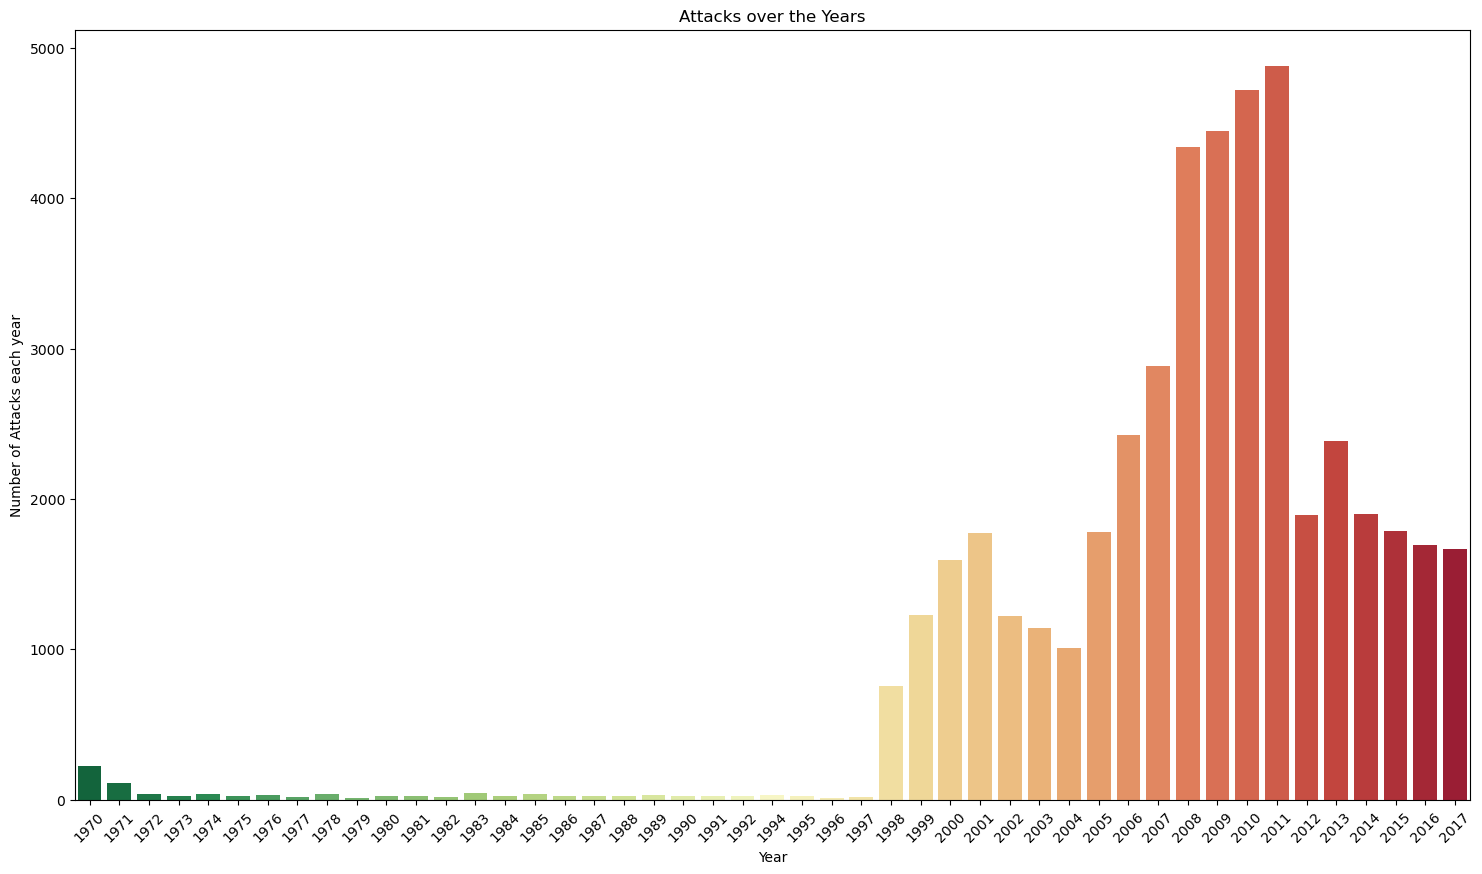

In [20]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,y = y_count_years,palette = 'RdYlGn_r')
plt.xticks(rotation = 45)
plt.xlabel('Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks over the Years')
plt.show()

In [21]:
#top 15 countries with highest number of activites
data.Country.value_counts()[:10]

Iraq             8811
India            5427
Pakistan         4900
Afghanistan      3206
Philippines      2253
Thailand         1782
Russia           1488
United States    1426
Colombia         1389
Algeria          1328
Name: Country, dtype: int64

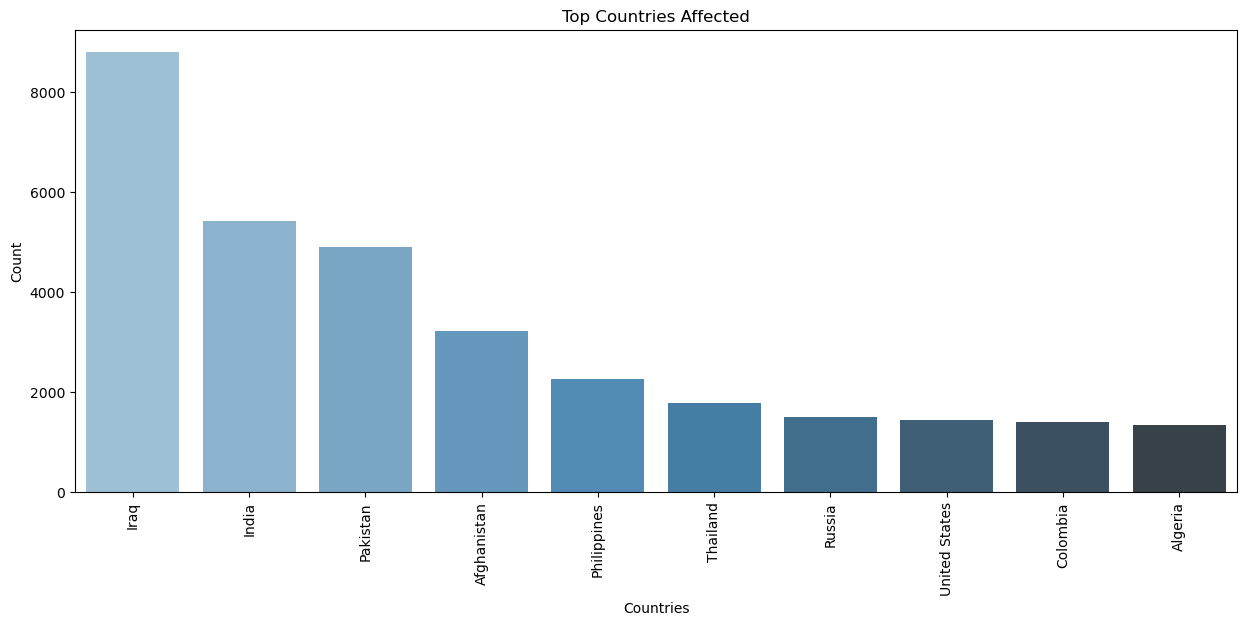

In [22]:
plt.subplots(figsize=(15,6))
sns.barplot(data['Country'].value_counts()[:10].index,data['Country'].value_counts()[:10].values,palette='Blues_d')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [23]:
#group with most activites
data.Group.value_counts()[:10]

Unknown                                           23234
Taliban                                            1884
Communist Party of India - Maoist (CPI-Maoist)     1654
Revolutionary Armed Forces of Colombia (FARC)       845
New People's Army (NPA)                             806
Tehrik-i-Taliban Pakistan (TTP)                     797
Islamic State of Iraq and the Levant (ISIL)         784
Maoists                                             740
Al-Shabaab                                          642
Liberation Tigers of Tamil Eelam (LTTE)             613
Name: Group, dtype: int64

In [24]:
# Total Number of people killed in terror attack
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData)))

Number of people killed by terror attack: 112679


In [25]:
# Let's look at what types of attacks these deaths were made of.
attackData = data.loc[:,'AttackType']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)

In [26]:
typeKillData.head()

,AttackType,Killed
5,Armed Assault,0.0
8,Facility/Infrastructure Attack,0.0
9,Facility/Infrastructure Attack,0.0
11,Facility/Infrastructure Attack,0.0
14,Facility/Infrastructure Attack,0.0


In [27]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Killed,31619.0,4419.0,59600.0,652.0,3147.0,2007.0,7055.0,474.0,3706.0


In [28]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


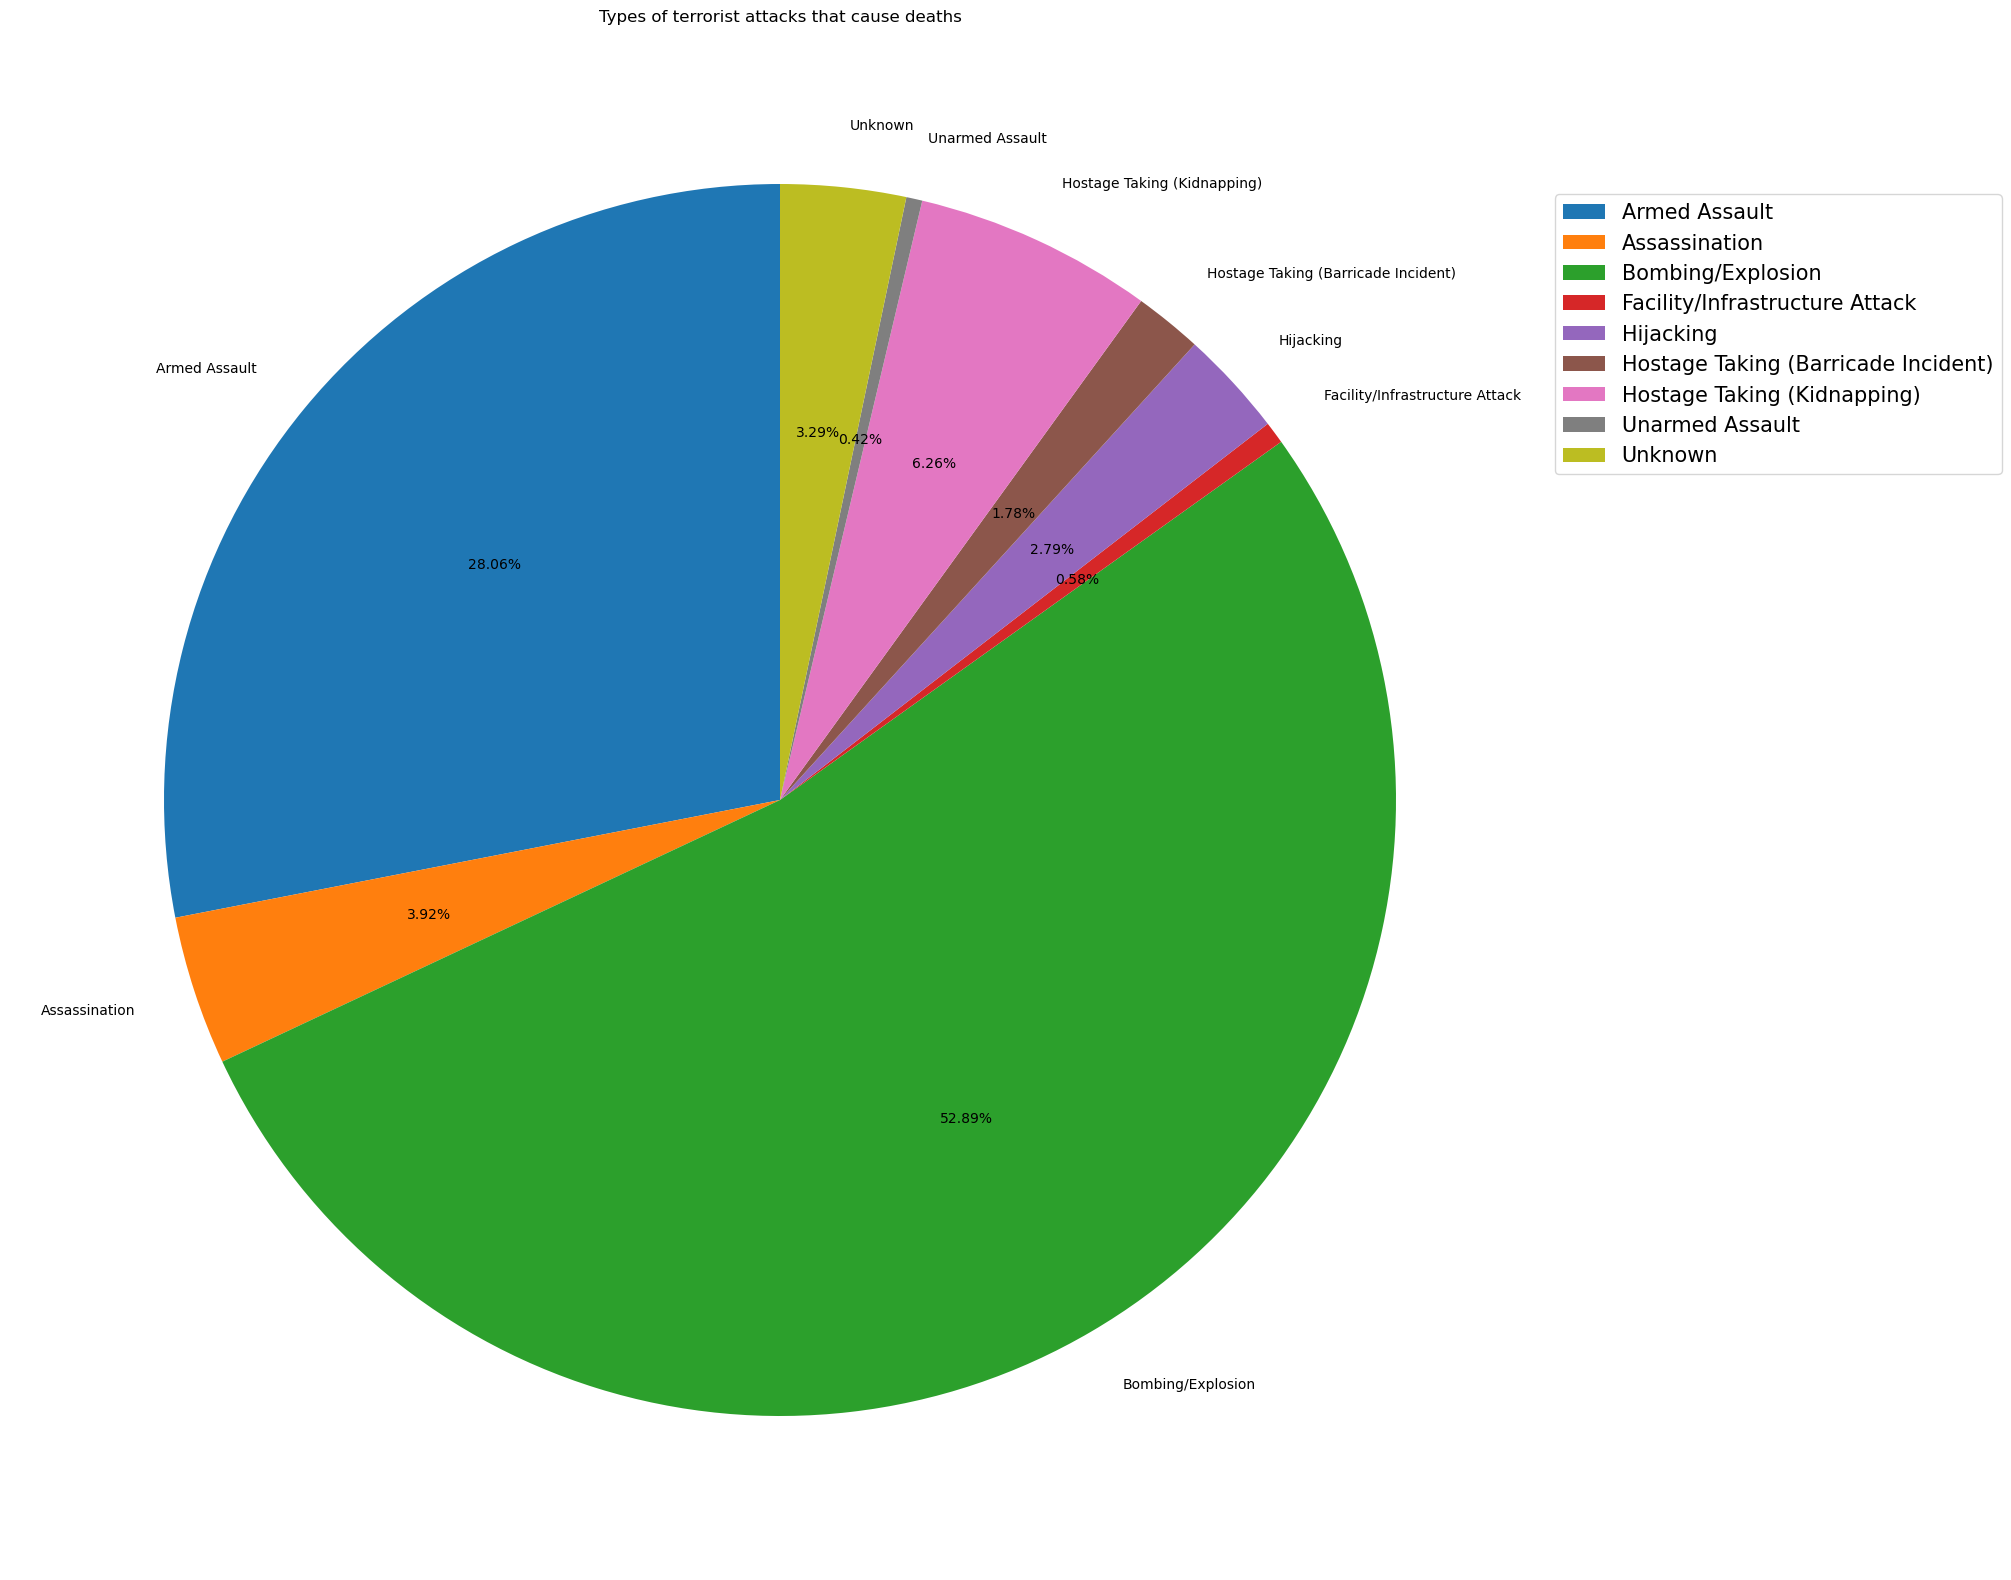

In [33]:

labels = typeKillFormatData.columns.tolist() 
transpoze = typeKillFormatData.T
sum_values = transpoze.sum(axis=1)

# Create the pie chart
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(sum_values, labels=labels, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)
plt.show()


In [34]:
#Number of Killed in Terrorist Attacks by Countries
countryData = data.loc[:,'Country']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [35]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza Strip,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe
Killed,9394.0,6.0,3983.0,809.0,0.0,8.0,5.0,3.0,30.0,7.0,...,1.0,68.0,16.0,0.0,673.0,0.0,1893.0,80.0,1.0,18.0


In [36]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

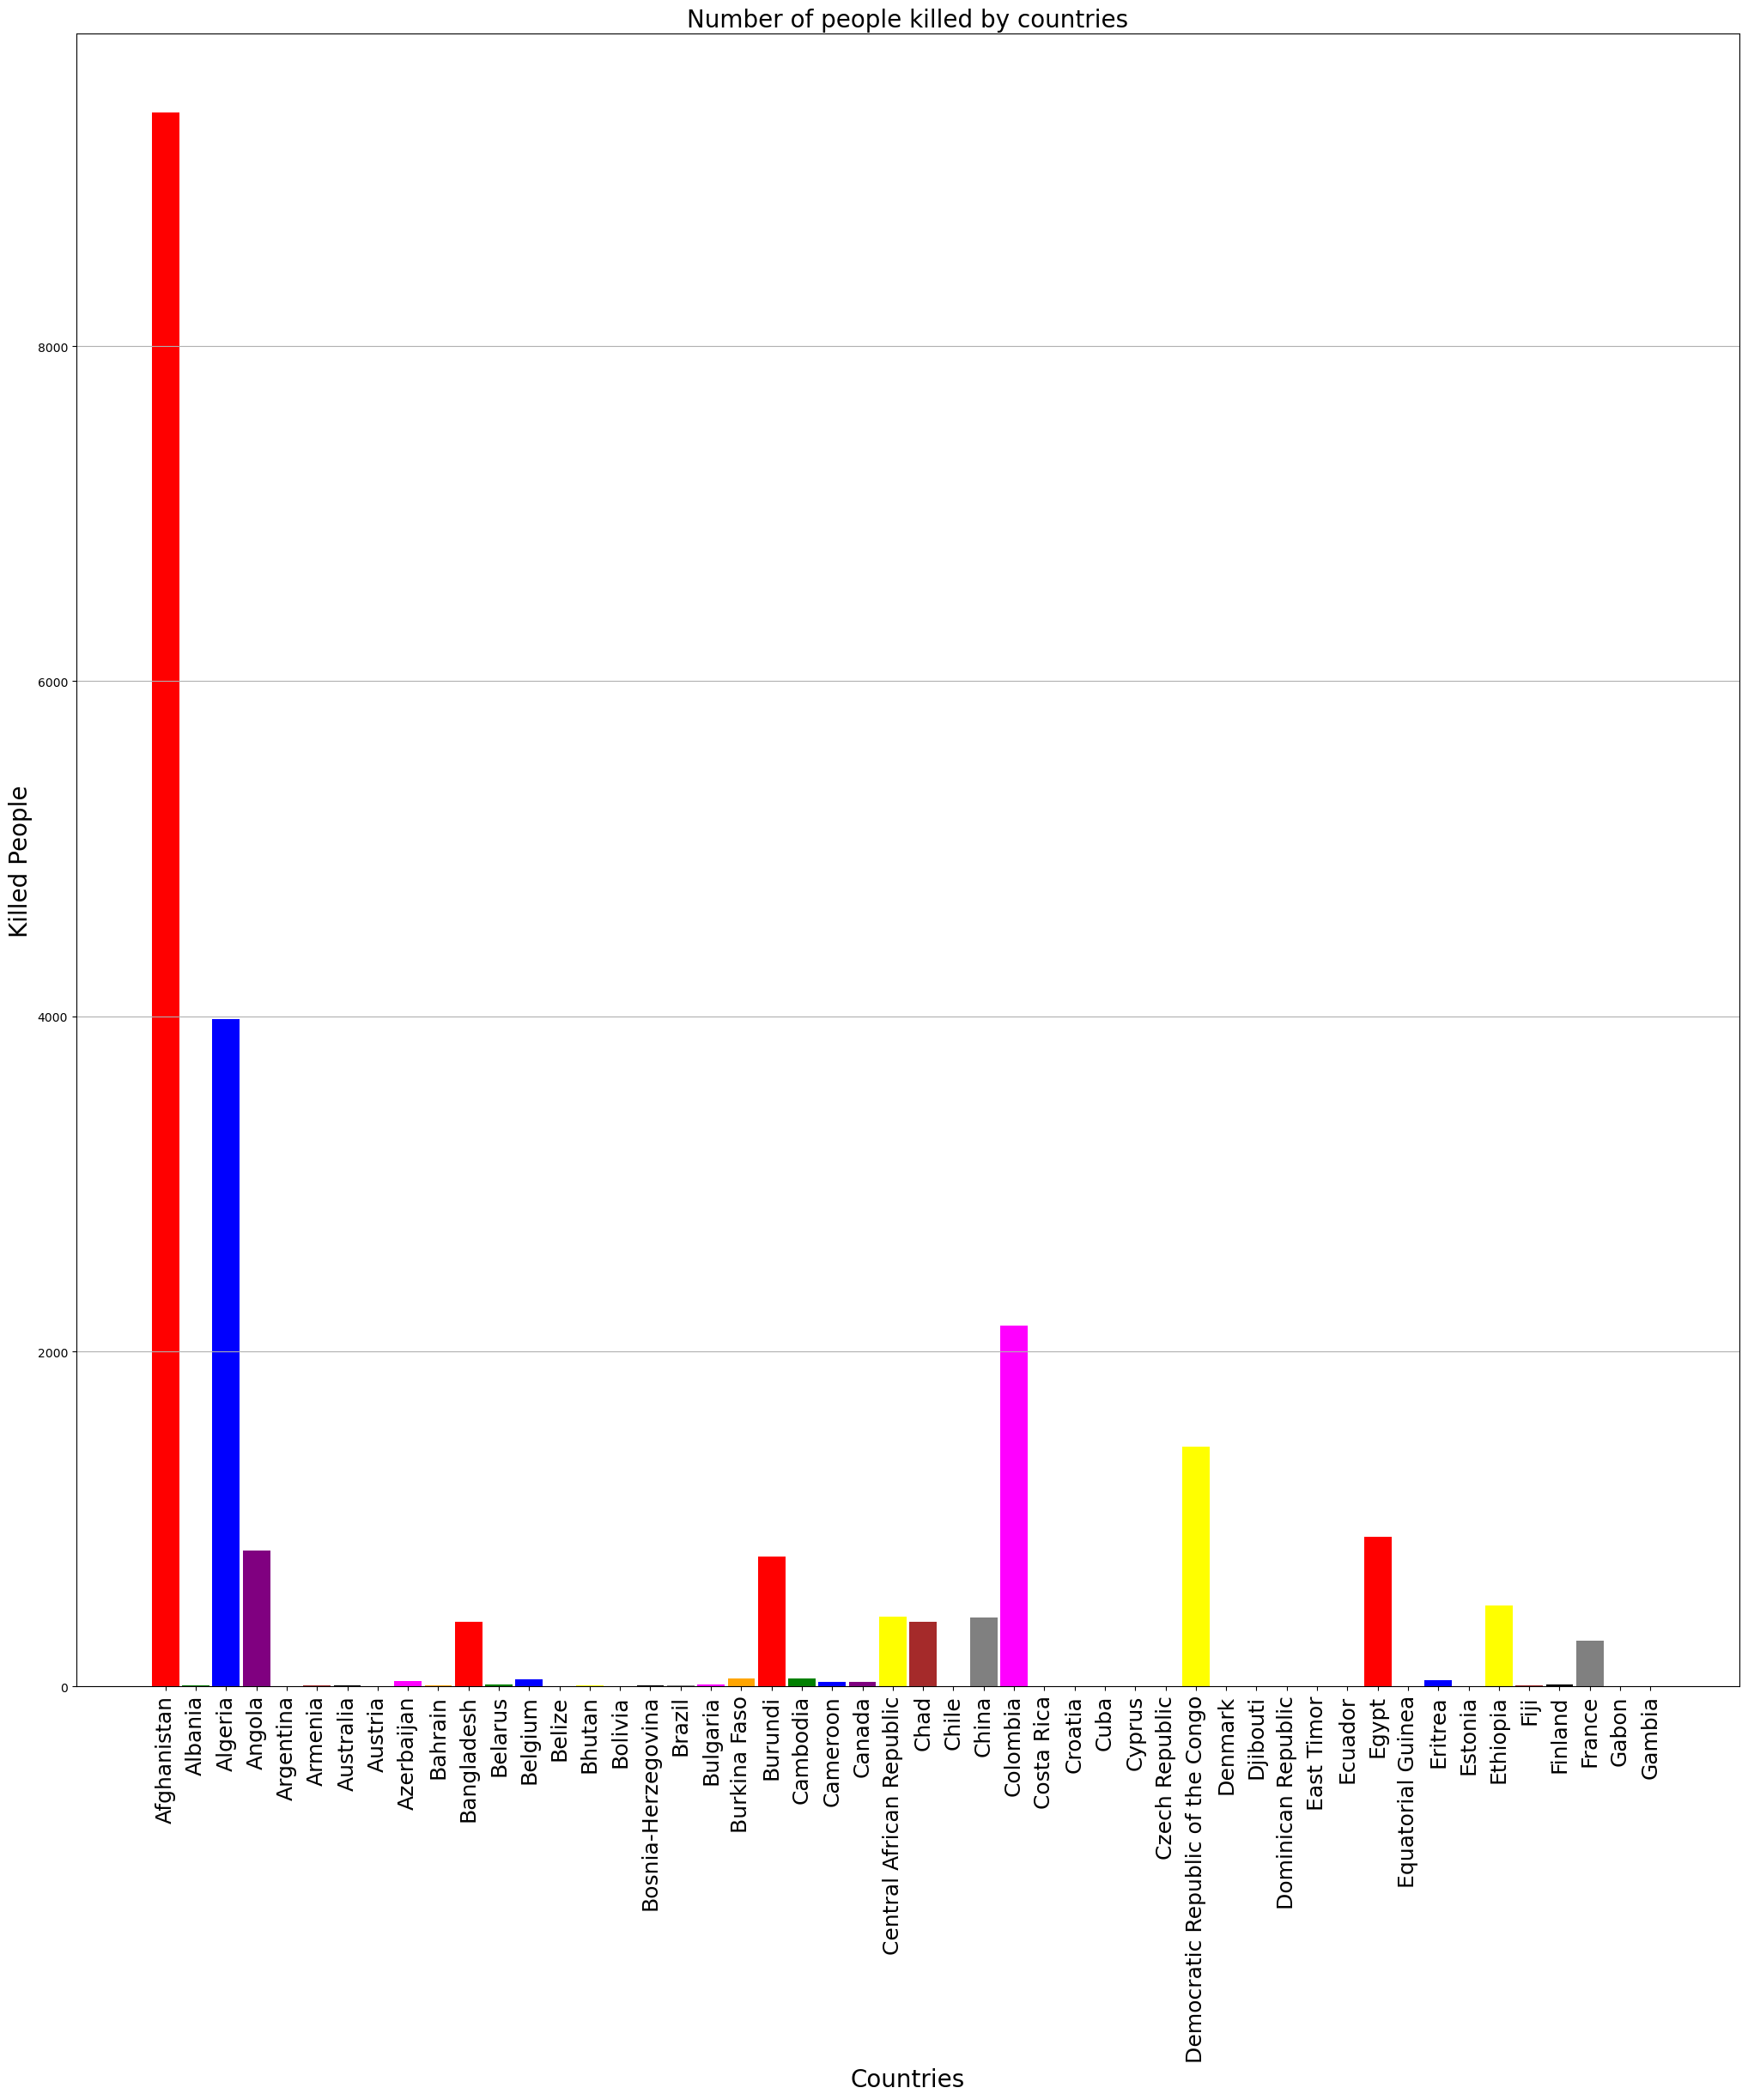

In [40]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

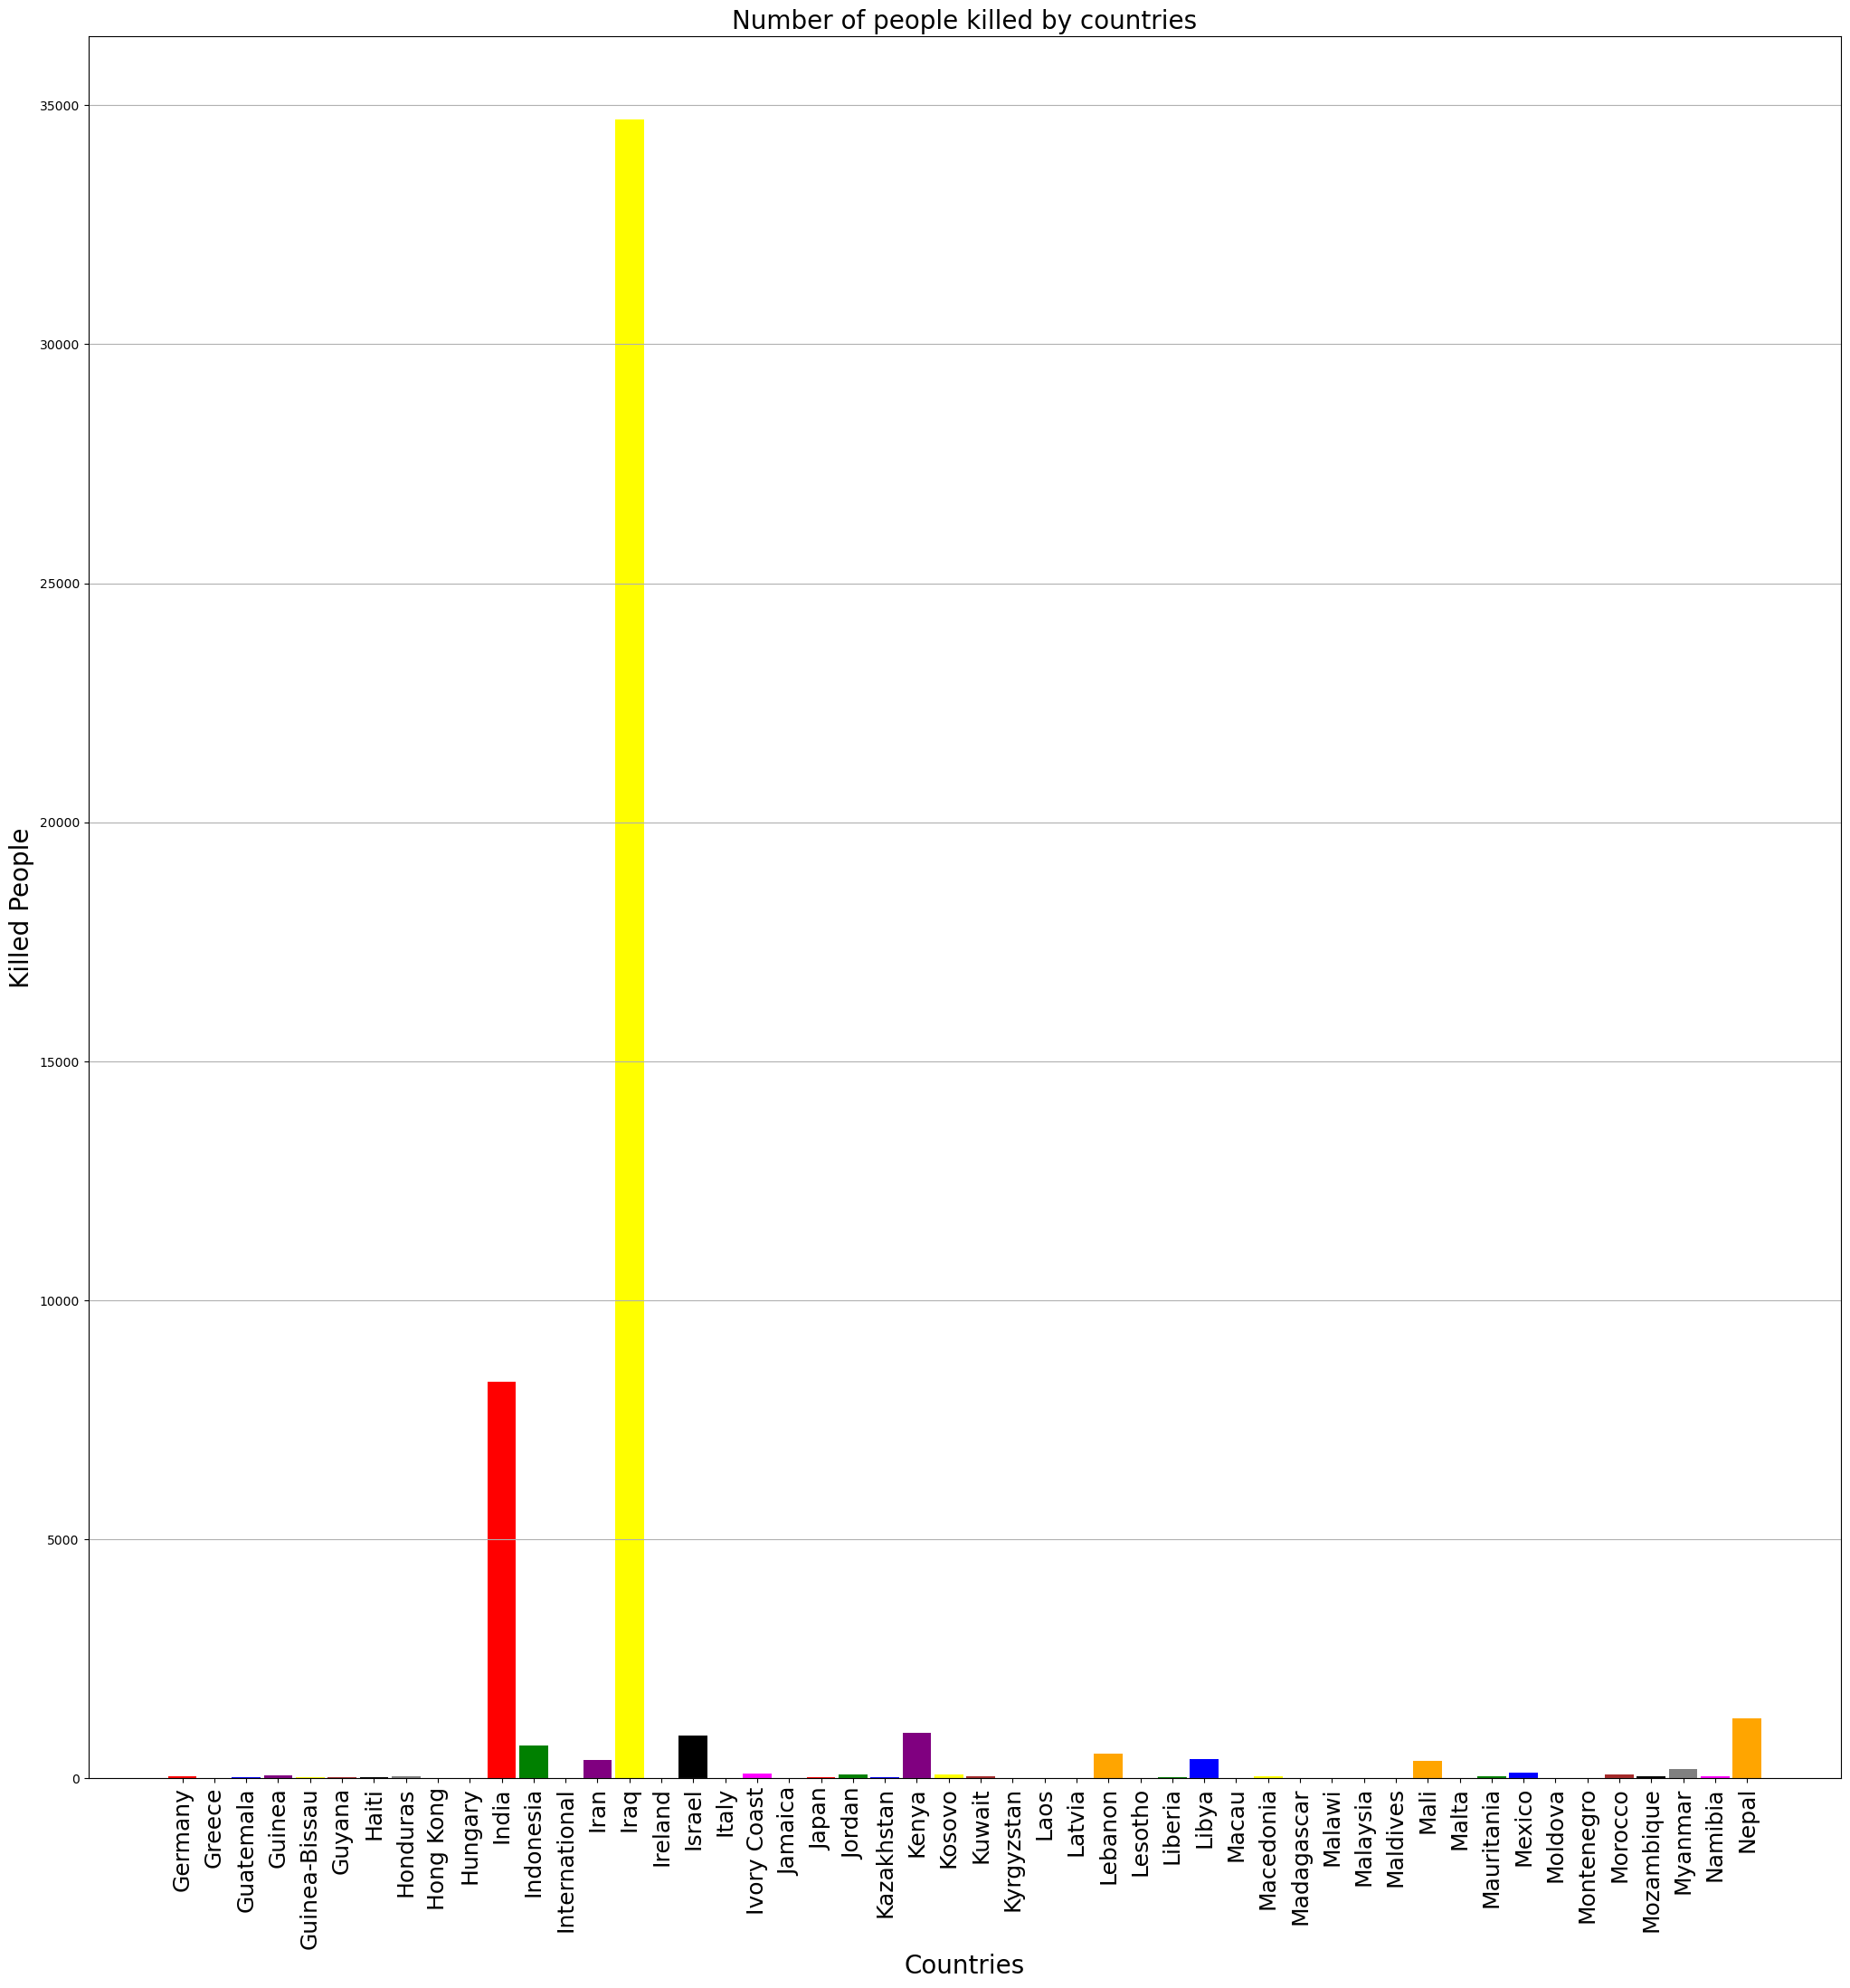

In [41]:
labels = countryKillFormatData.columns.tolist()
labels = labels[51:101] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[51:101]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

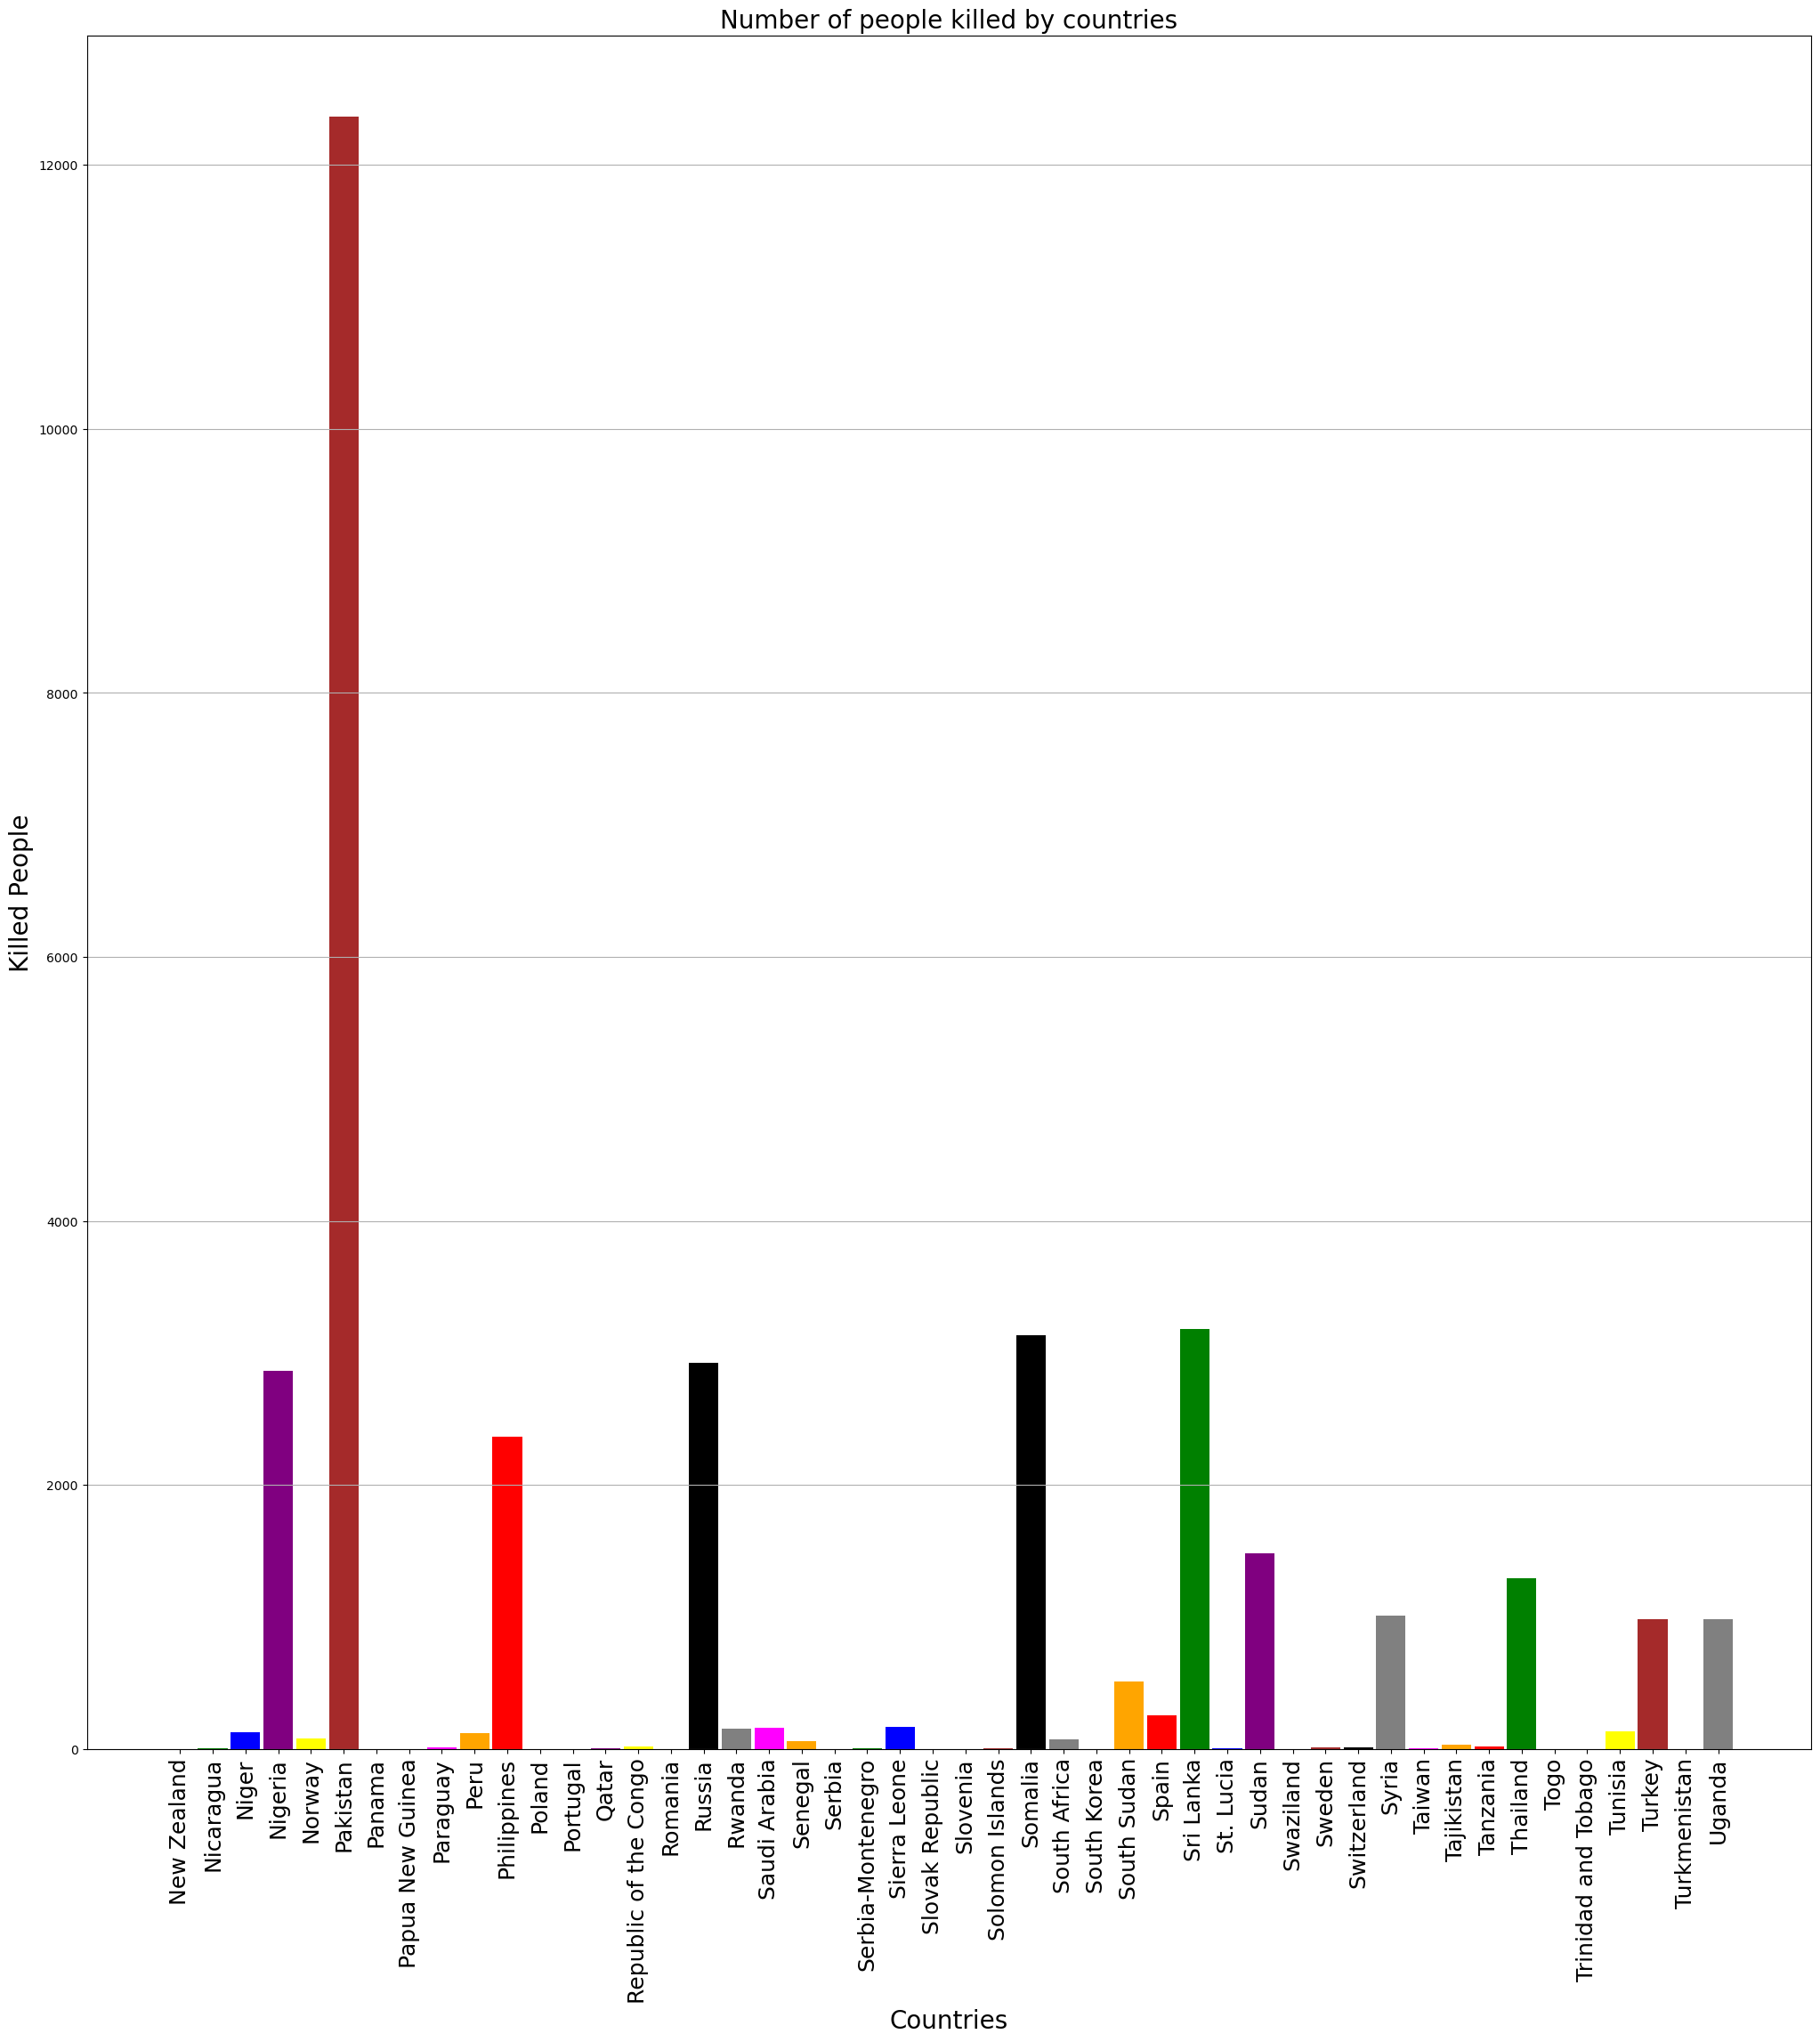

In [42]:
labels = countryKillFormatData.columns.tolist()
labels = labels[102:150] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[102:150]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

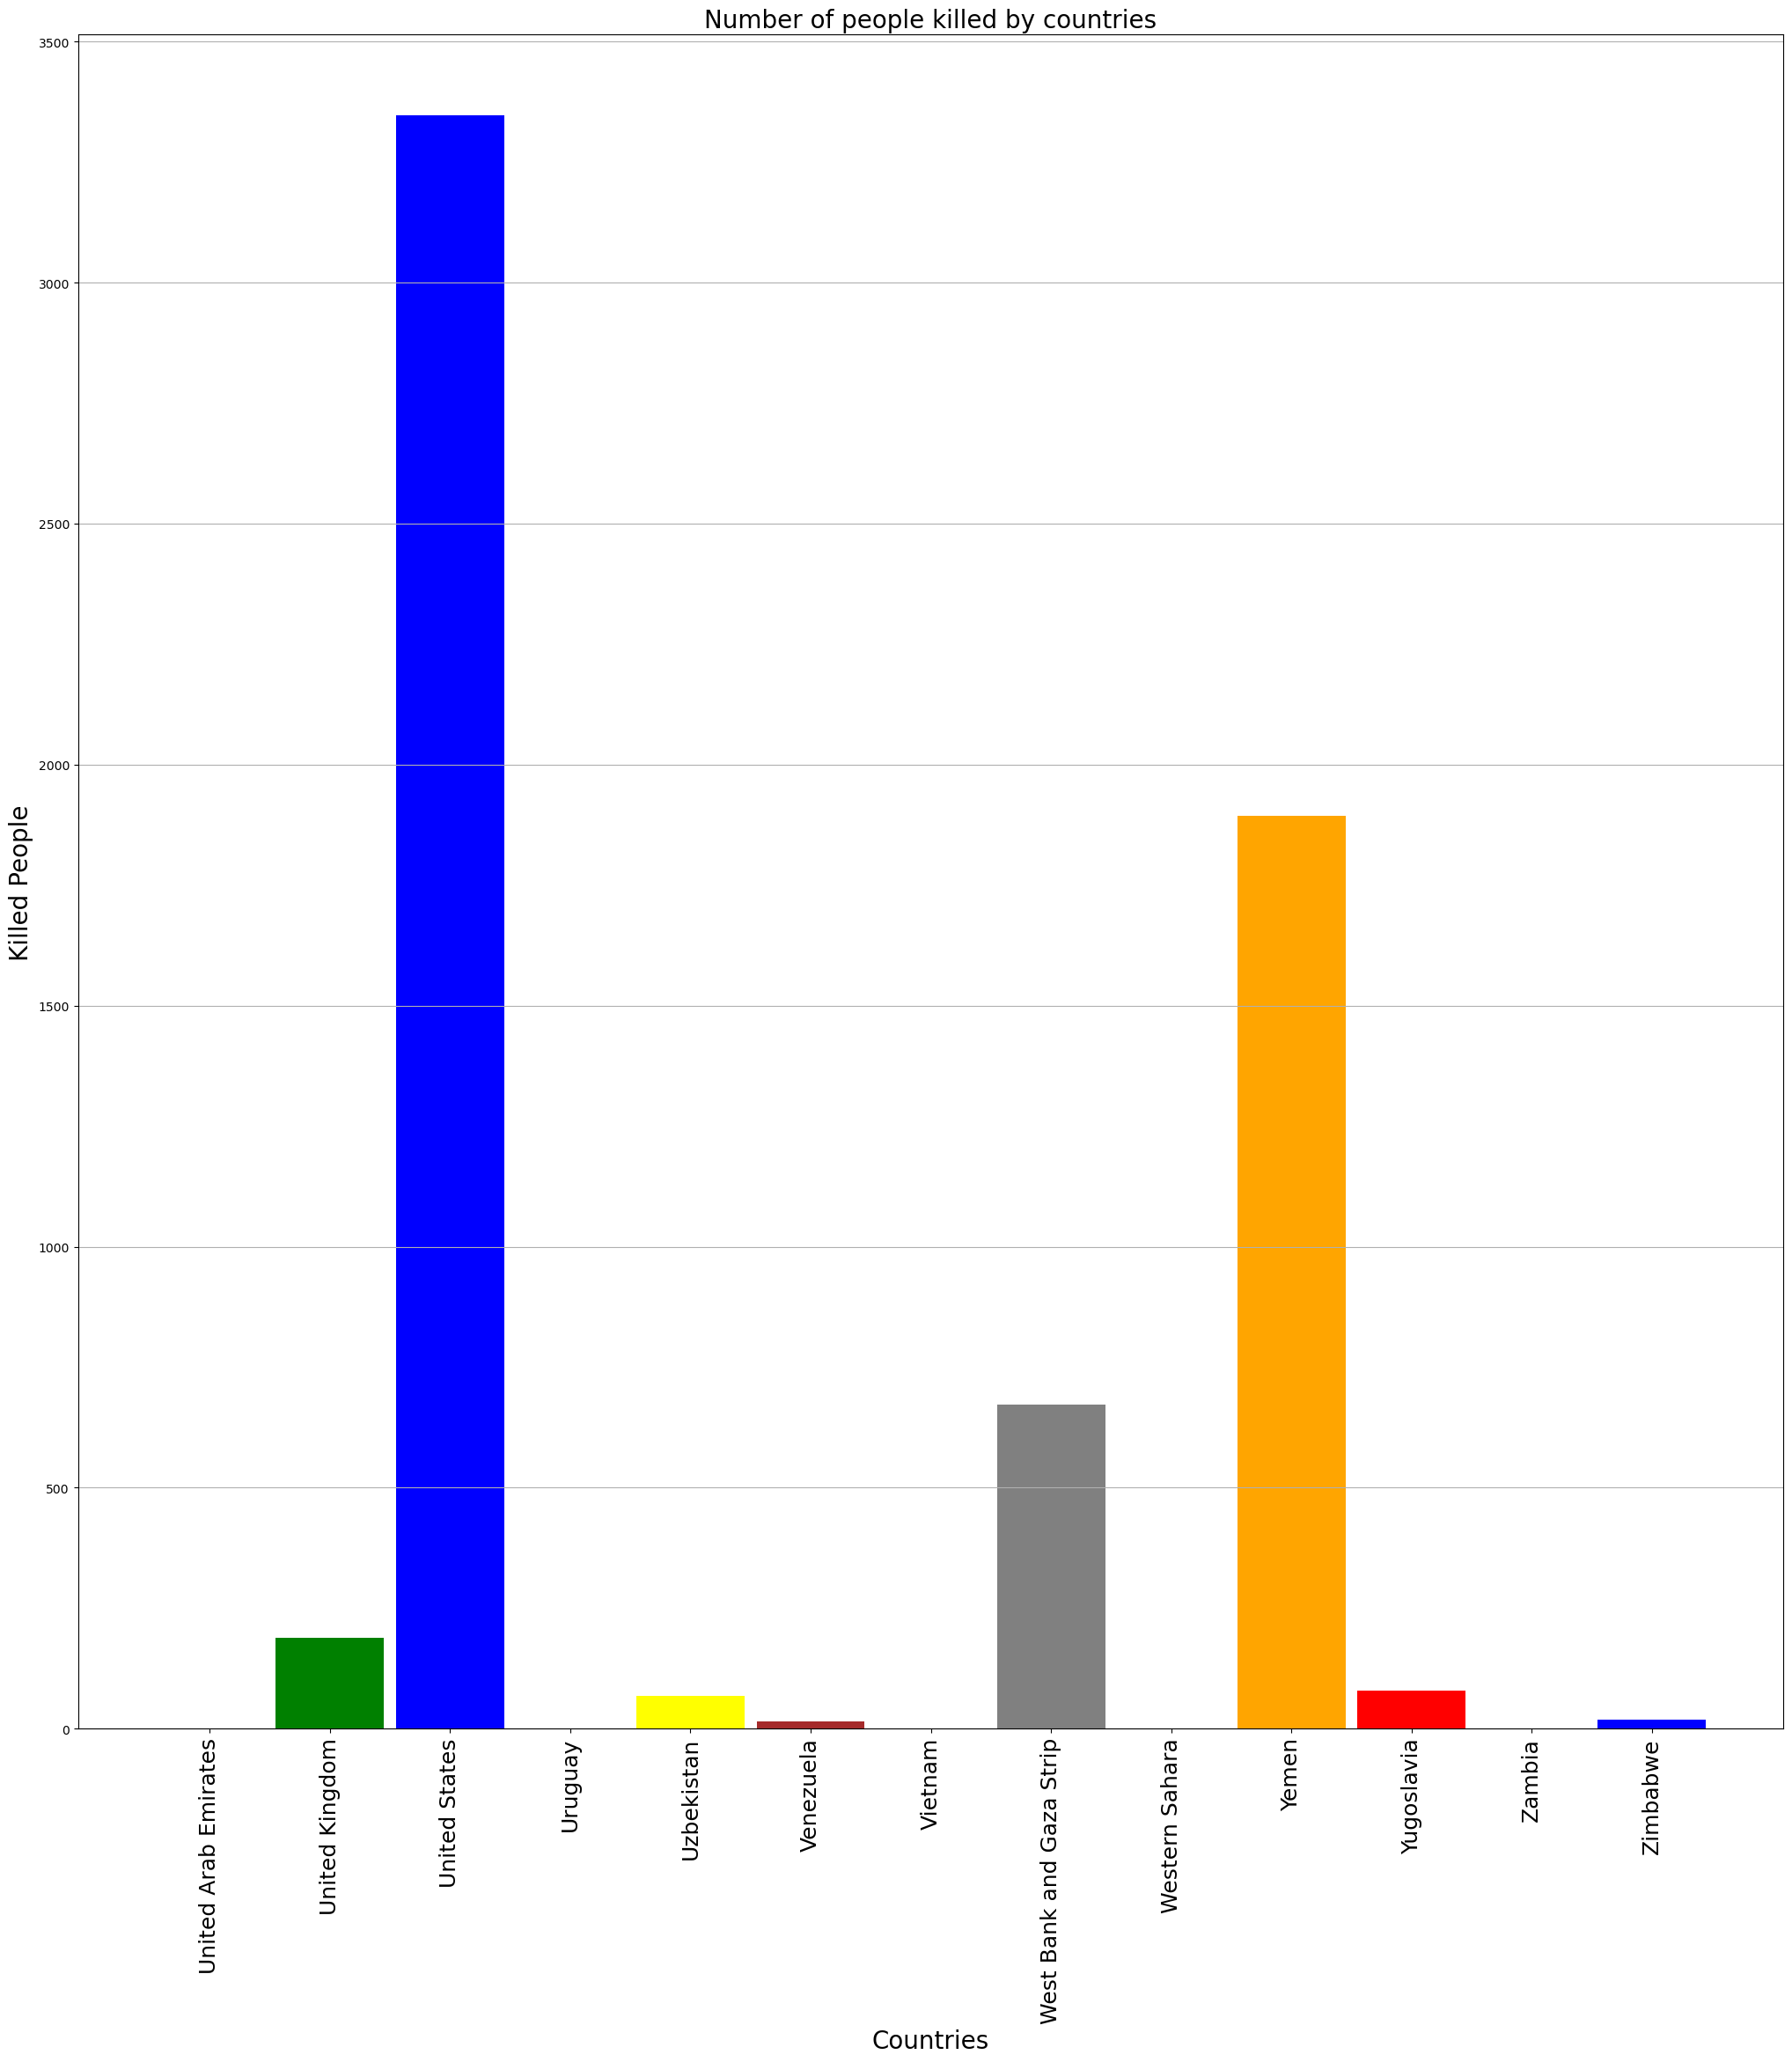

In [43]:
labels = countryKillFormatData.columns.tolist()
labels = labels[151:206] #50 bar provides nice view
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[151:206]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

In [ ]:
#we have divided all the plots so we divided them into 4 plots